Columns: ['feature1', 'feature2', 'feature3', 'label']


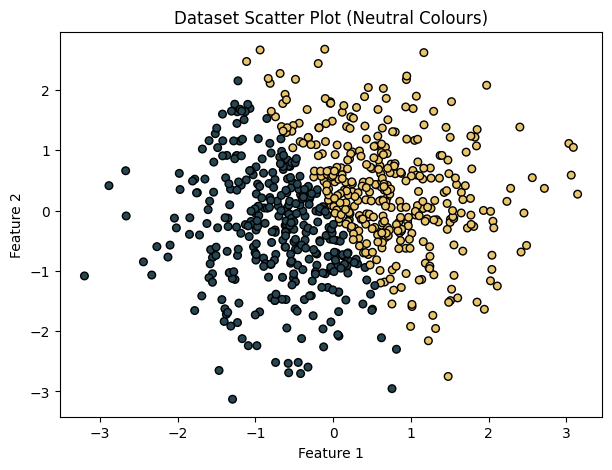

Euclidean (p=2) Accuracy: 0.994


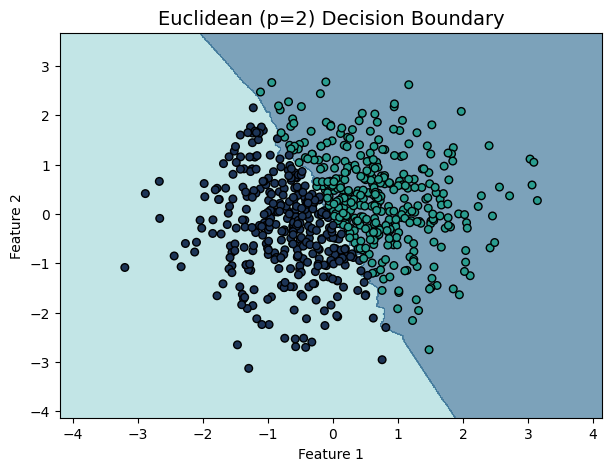

Manhattan (p=1) Accuracy: 0.994


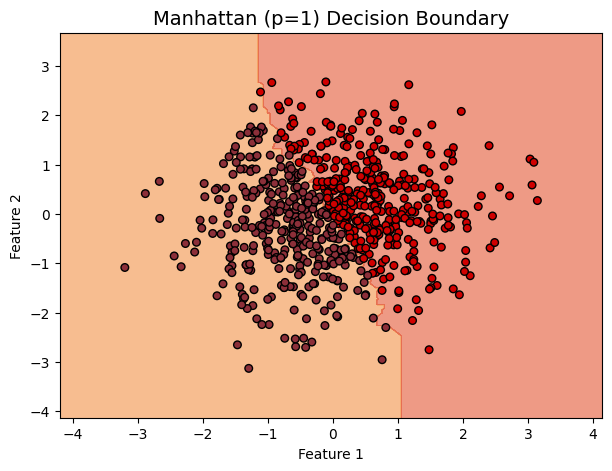

Minkowski (p=3) Accuracy: 0.994


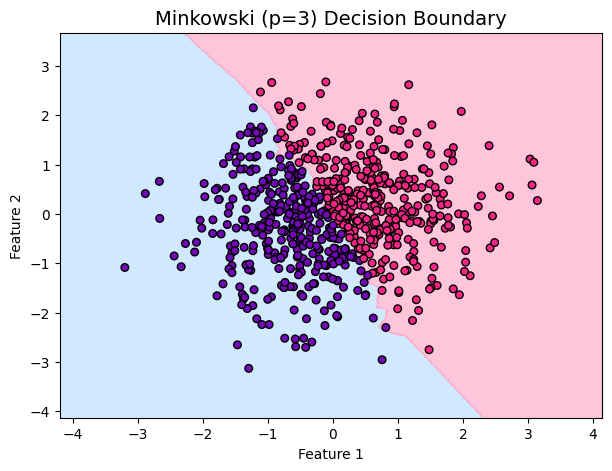

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


file_path = "3D_dataset.csv"
df = pd.read_csv(file_path)

print("Columns:", df.columns.tolist())

feature_cols = ["feature1", "feature2"]
label_col = "label"

X = df[feature_cols].values
y = df[label_col].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


color_maps = {
    "Euclidean (p=2)": {
        "light": ListedColormap(["#a8dadc", "#457b9d"]),
        "bold" : ListedColormap(["#1d3557", "#2a9d8f"])
    },
    "Manhattan (p=1)": {
        "light": ListedColormap(["#f4a261", "#e76f51"]),
        "bold" : ListedColormap(["#8c2f39", "#d00000"])
    },
    "Minkowski (p=3)": {
        "light": ListedColormap(["#bde0fe", "#ffafcc"]),
        "bold" : ListedColormap(["#7209b7", "#f72585"])
    }
}


def plot_decision_boundary(model, X, y, title, cmaps):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=cmaps["light"], alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmaps["bold"],
                edgecolor="black", s=30)
    plt.title(title, fontsize=14)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plt.figure(figsize=(7,5))
neutral_map = ListedColormap(["#264653", "#e9c46a"])
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y,
            cmap=neutral_map, edgecolor='k', s=30)
plt.title("Dataset Scatter Plot (Neutral Colours)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


metrics = {
    "Euclidean (p=2)": 2,
    "Manhattan (p=1)": 1,
    "Minkowski (p=3)": 3
}

for title, p in metrics.items():
    knn = KNeighborsClassifier(n_neighbors=5, p=p)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"{title} Accuracy: {score:.3f}")


    plot_decision_boundary(knn, X_scaled, y, f"{title} Decision Boundary", color_maps[title])


# **GIT HUB Repository**

https://github.com/venkat-chowdary12/Machine-Learning-Tutorial/tree/main
